In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.layers import Input, LSTM, GRU, Dense
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from dataset import kline_data, prepare_prediction_data
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
def rnn_gru(input_shape):
    input_1 = Input(shape=input_shape)
    x = GRU(64, return_sequences=True)(input_1)
    x = GRU(16)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_1, outputs=x)
    model.compile(optimizer="adam", loss='mse')
    return model

In [3]:
def rnn_lstm(input_shape):
    input_1 = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(input_1)
    x = LSTM(16)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_1, outputs=x)
    model.compile(optimizer="adam", loss='mse')
    return model

In [4]:
if not os.path.exists('saved_models'):
    os.mkdir('saved_models')
if not os.path.exists('plots'):
    os.mkdir('plots')

In [5]:
btc = kline_data()
btc['d_oc_p'] = (btc['close'] - btc['open']) / btc['open']
btc.tail()

Last saved data candle close time: 2021-08-04 00:00:00


,open_time,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,d_oc_p
1443,2021-07-30 00:00:00,40018.49,42316.71,38313.23,42206.37,73602.784805,2021-07-31 00:00:00,2.939834e+09,1797012,37730.426862,1.509173e+09,0.0,0.054672
1444,2021-07-31 00:00:00,42206.36,42448.00,41000.15,41461.83,44849.791012,2021-08-01 00:00:00,1.868286e+09,1565380,22844.245050,9.518879e+08,0.0,-0.017640
1445,2021-08-01 00:00:00,41461.84,42599.00,39422.01,39845.44,53953.186326,2021-08-02 00:00:00,2.227567e+09,1603964,25796.753795,1.066580e+09,0.0,-0.038985
1446,2021-08-02 00:00:00,39850.27,40480.01,38690.00,39147.82,50837.351954,2021-08-03 00:00:00,2.010928e+09,1162878,24558.005343,9.715967e+08,0.0,-0.017627
1447,2021-08-03 00:00:00,39146.86,39780.00,37642.03,38207.05,57117.435853,2021-08-04 00:00:00,2.195361e+09,1379871,27683.466598,1.064119e+09,0.0,-0.024007


In [6]:
data = np.array(btc['d_oc_p'])
minmax = MinMaxScaler()
data_norm = np.squeeze(minmax.fit_transform(np.expand_dims(data, axis=-1)))
data_norm.shape

(1448,)

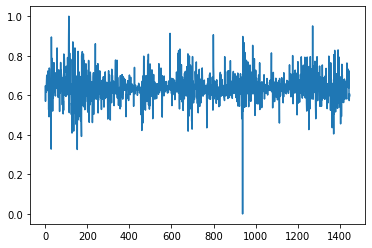

In [7]:
plt.plot(data_norm)

In [8]:
input_size = 50
x, y = prepare_prediction_data(data_norm, input_size=input_size)
n_samples = x.shape[0]
x.shape, y.shape

((1398, 50), (1398,))

In [9]:
x_train = np.expand_dims(x[:int(n_samples * 0.85), :], axis=-1)
x_test = np.expand_dims(x[int(n_samples * 0.85):, :], axis=-1)
y_train = y[:int(n_samples * 0.85)]
y_test = y[int(n_samples * 0.85):]

### GRU

In [10]:
model = rnn_gru(input_shape=(input_size, 1))
ea = EarlyStopping(patience=20)
cp = ModelCheckpoint('saved_models/gru_d_oc_p_1d.h5')
cb = [ea, cp]
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=cb, validation_split=0.3)

Epoch 1/100
26/26 [==============================] - 4s 65ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 2/100
26/26 [==============================] - 1s 36ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 3/100
26/26 [==============================] - 1s 35ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 4/100
26/26 [==============================] - 1s 35ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 5/100
26/26 [==============================] - 1s 35ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 6/100
26/26 [==============================] - 1s 38ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 7/100
26/26 [==============================] - 1s 36ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 8/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 9/100
26/26 [==============================] - 1s 38ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 10/100
26/26 [==============================] - 1s 49ms/step - loss: 0.0047 - val_loss: 0.0042

26/26 [==============================] - 2s 61ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 83/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 84/100
26/26 [==============================] - 2s 61ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 85/100
26/26 [==============================] - 1s 56ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 86/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 87/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 88/100
26/26 [==============================] - 1s 53ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 89/100
26/26 [==============================] - 2s 61ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 90/100
26/26 [==============================] - 1s 57ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 91/100
26/26 [==============================] - 1s 52ms/step - loss: 0.0047 - val_loss: 0.0041
Epo

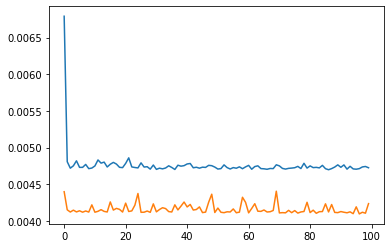

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [12]:
print(f'Test set MSE: {model.evaluate(x_test, y_test, verbose=0)}')

Test set MSE: 0.005729277152568102


In [13]:
y_test_pred = np.squeeze(model.predict(x_test))
test_open_prices = np.array(btc['open'])[-y_test.shape[0]:]
test_close_prices = np.array(btc['close'])[-y_test.shape[0]:]

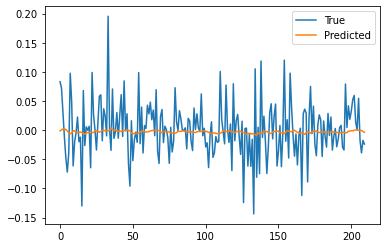

In [14]:
plt.plot(np.squeeze(minmax.inverse_transform(np.expand_dims(y_test, axis=-1))), label='True')
plt.plot(np.squeeze(minmax.inverse_transform(np.expand_dims(y_test_pred, axis=-1))), label='Predicted')
plt.legend()

According to this, the best price prediction for tomorrow is today's price

In [15]:
d_oc_p_test = np.squeeze(minmax.inverse_transform(np.expand_dims(y_test_pred, axis=-1)))
d_oc_test = d_oc_p_test * test_open_prices
test_close_prices_pred = test_open_prices + d_oc_test

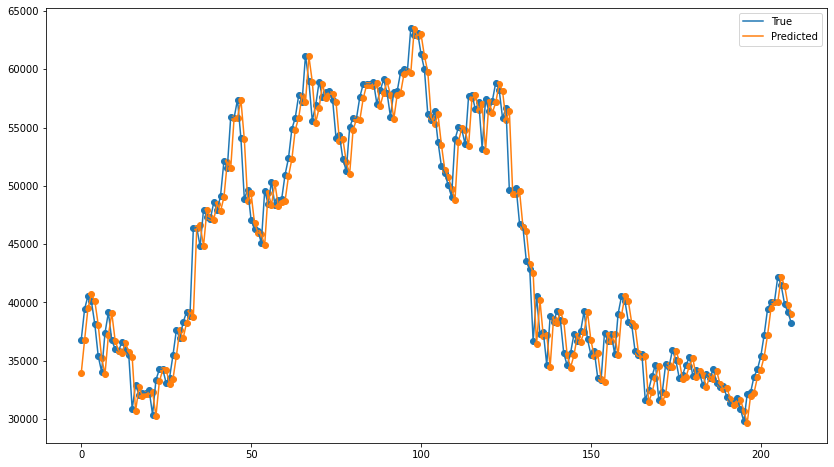

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(test_close_prices, label='True')
plt.plot(test_close_prices_pred, label='Predicted')
plt.scatter(np.arange(test_close_prices.shape[0]), test_close_prices)
plt.scatter(np.arange(test_close_prices.shape[0]), test_close_prices_pred)
plt.legend()

In [18]:
print(f'Test set MAE: {mean_absolute_error(test_close_prices, test_close_prices_pred)}')
mean_absolute_percentage_error

Test set MAE: 1490.7911663469831


### LSTM

In [ ]:
model = rnn_lstm(input_shape=(input_size, 1))
ea = EarlyStopping(patience=20)
cp = ModelCheckpoint('saved_models/lstm_d_oc_p_1d.h5')
cb = [ea, cp]
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=cb, validation_split=0.3)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
print(f'Test set MSE: {model.evaluate(x_test, y_test, verbose=0)}')

In [ ]:
y_test_pred = np.squeeze(model.predict(x_test))
test_open_prices = np.array(btc['open'])[-y_test.shape[0]:]
test_close_prices = np.array(btc['close'])[-y_test.shape[0]:]

In [ ]:
plt.plot(np.squeeze(minmax.inverse_transform(np.expand_dims(y_test, axis=-1))), label='True')
plt.plot(np.squeeze(minmax.inverse_transform(np.expand_dims(y_test_pred, axis=-1))), label='Predicted')
plt.legend()

In [ ]:
d_oc_p_test = np.squeeze(minmax.inverse_transform(np.expand_dims(y_test_pred, axis=-1)))
d_oc_test = d_oc_p_test * test_open_prices
test_close_prices_pred = test_open_prices + d_oc_test

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_close_prices, label='True')
plt.plot(test_close_prices_pred, label='Predicted')
plt.scatter(np.arange(test_close_prices.shape[0]), test_close_prices)
plt.scatter(np.arange(test_close_prices.shape[0]), test_close_prices_pred)
plt.legend()